##### **Project Name**    - Tata Steel
##### **Project Type**    - EDA
##### **Contribution**    - Individual/Team

# **Project Summary -**
# 'Type', 'Air temperature [K]','Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]','Tool wear [min]','TWF', 'HDF', 'PWF', 'OSF','RNF' are independent variable while 'Machine failure' is a dependent variable
# **Problem Statement -** Need to find the factors responsible for machine failure
# **Business Objective -** Tata steel (manufacturing company) aims to reduce machine failure using data analysis and Machine Learning

### **KNOW YOUR DATA**

IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading  ###

In [ ]:
data = pd.read_csv('/content/train_test.csv')

In [ ]:
data.rename(columns={'Process temperature [K]':'Process_temperature','Machine failure':'Machine_failure','Tool wear [min]':'Tool_wear','Air temperature [K]':'Air_temperature','Rotational speed [rpm]':'Rotational_speed','Torque [Nm]':'Torque'},inplace=True)

### Dataset First View

In [ ]:
data.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


Dataset Rows and columns count

In [ ]:
data.shape
print(f'data has {data.shape[0]} rows and {data.shape[1]} columns')

data has 227383 rows and 14 columns


### Dataset Information

In [ ]:
print(f'the information of data is {data.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227383 entries, 0 to 227382
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   227383 non-null  int64  
 1   Type                 227383 non-null  int64  
 2   Air_temperature      227383 non-null  float64
 3   Process_temperature  227383 non-null  float64
 4   Rotational_speed     227383 non-null  int64  
 5   Torque               227383 non-null  float64
 6   Tool_wear            227383 non-null  int64  
 7   Machine_failure      227383 non-null  int64  
 8   TWF                  227383 non-null  int64  
 9   HDF                  227383 non-null  int64  
 10  PWF                  227383 non-null  int64  
 11  OSF                  227383 non-null  int64  
 12  RNF                  227383 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 22.6 MB
the information of data is None


In [ ]:
data= data.drop(columns ='Product ID')

#### Duplicate Values

In [ ]:
data.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
data.isnull().sum()

,0
id,0
Type,0
Air_temperature,0
Process_temperature,0
Rotational_speed,0
Torque,0
Tool_wear,0
Machine_failure,0
TWF,0
HDF,0


## ***2. Understanding Your Variables***

In [ ]:
# dataset columns
print(f'data columns are \n{data.columns}')

data columns are 
Index(['id', 'Type', 'Air_temperature', 'Process_temperature',
       'Rotational_speed', 'Torque', 'Tool_wear', 'Machine_failure', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')


In [ ]:
# dataset description
print(f'data description is {data.describe().T}')

data description is                         count           mean           std     min      25%  \
id                   227383.0  113691.000000  65639.962467     0.0  56845.5   
Type                 227383.0       1.170562      0.522076     0.0      1.0   
Air_temperature      227383.0     299.861463      1.860371   295.3    298.3   
Process_temperature  227383.0     309.940392      1.385219   305.7    308.7   
Rotational_speed     227383.0    1520.409938    139.231189  1168.0   1432.0   
Torque               227383.0      40.343262      8.503195     3.8     34.6   
Tool_wear            227383.0     104.362925     63.927361     0.0     48.0   
Machine_failure      227383.0       0.009447      0.096734     0.0      0.0   
TWF                  227383.0       0.001522      0.038979     0.0      0.0   
HDF                  227383.0       0.005233      0.072153     0.0      0.0   
PWF                  227383.0       0.002379      0.048720     0.0      0.0   
OSF                  227383.0   

### Check Unique Values for each variable.

In [ ]:
features = ['id', 'Type', 'Air_temperature',
       'Process_temperature', 'Rotational_speed', 'Torque',
       'Tool_wear', 'Machine_failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF']

for i,col in enumerate(features):
  print(f'the unique values for {col} is {data[col].unique()} \n')
  print(f'the length of unique values for {col} is {data[col].nunique()} \n')

the unique values for id is [     0      1      2 ... 227380 227381 227382] 

the length of unique values for id is 227383 

the unique values for Type is [1 2 0] 

the length of unique values for Type is 3 

the unique values for Air_temperature is [300.6   302.6   299.3   301.    298.    298.4   299.6   298.7   297.7
 300.5   301.5   301.4   297.1   298.5   297.6   300.4   303.5   298.6
 300.9   297.2   298.3   297.4   301.3   300.2   300.1   297.8   300.7
 300.8   299.2   299.7   302.5   301.8   296.7   302.4   298.1   301.9
 299.1   299.    299.8   298.9   297.3   297.9   298.8   300.    302.3
 297.5   303.9   301.7   303.7   301.2   303.3   303.6   300.3   302.1
 299.5   299.4   302.2   297.    298.2   304.    303.1   296.9   301.1
 295.5   302.    304.2   303.4   296.1   302.9   301.6   304.1   303.
 295.6   302.7   296.8   296.2   303.8   299.9   295.7   303.2   296.3
 295.9   295.8   302.8   296.6   296.5   296.4   304.3   296.    295.4
 304.4   295.3   300.98  297.095 303.96 ]

In [ ]:
numeric_cols = [i for i in data if data[i].dtypes in ('int64','float64')]
numeric_cols

['id',
 'Type',
 'Air_temperature',
 'Process_temperature',
 'Rotational_speed',
 'Torque',
 'Tool_wear',
 'Machine_failure',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

In [ ]:
data.columns

Index(['id', 'Type', 'Air_temperature', 'Process_temperature',
       'Rotational_speed', 'Torque', 'Tool_wear', 'Machine_failure', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Type'] = le.fit_transform(data['Type'])


In [ ]:
data['Type']

,Type
0,1
1,2
2,1
3,1
4,2
...,...
227378,1
227379,1
227380,1
227381,1


#To find the relationship between all the variables we use corr()

In [ ]:
data.corr()

,id,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Machine_failure,TWF,HDF,PWF,OSF,RNF
id,1.000000,0.001211,-0.003459,-0.002306,0.002169,-0.001292,-0.002154,-0.066964,-0.000976,0.000746,0.000553,0.000642,0.000965
Type,0.001211,1.000000,0.010608,-0.000998,-0.003098,0.001664,0.002309,-0.003951,0.000429,0.003623,0.002546,-0.013765,-0.000592
Air_temperature,-0.003459,0.010608,1.000000,0.856036,0.015081,-0.006021,0.017575,0.052429,0.005818,0.101676,0.006339,0.009733,0.003583
Process_temperature,-0.002306,-0.000998,0.856036,1.000000,0.010081,-0.006266,0.013513,0.023957,0.006526,0.042362,0.001274,0.008379,0.005393
Rotational_speed,0.002169,-0.003098,0.015081,0.010081,1.000000,-0.778534,0.005937,-0.046886,-0.007050,-0.084110,0.052596,-0.061619,-0.002646
Torque,-0.001292,0.001664,-0.006021,-0.006266,-0.778534,1.000000,-0.003629,0.112620,0.014981,0.102001,0.049928,0.108929,0.005899
Tool_wear,-0.002154,0.002309,0.017575,0.013513,0.005937,-0.003629,1.000000,0.043681,0.045167,0.007793,0.005773,0.064841,-0.002420
Machine_failure,-0.066964,-0.003951,0.052429,0.023957,-0.046886,0.112620,0.043681,1.000000,0.243458,0.432727,0.297579,0.383706,0.001055
TWF,-0.000976,0.000429,0.005818,0.006526,-0.007050,0.014981,0.045167,0.243458,1.000000,0.009678,0.037463,0.044479,0.002868
HDF,0.000746,0.003623,0.101676,0.042362,-0.084110,0.102001,0.007793,0.432727,0.009678,1.000000,0.038994,0.061753,0.001648


#Heatmap is used to see the magnitude and intensity of each variable versus all variables

<Axes: >

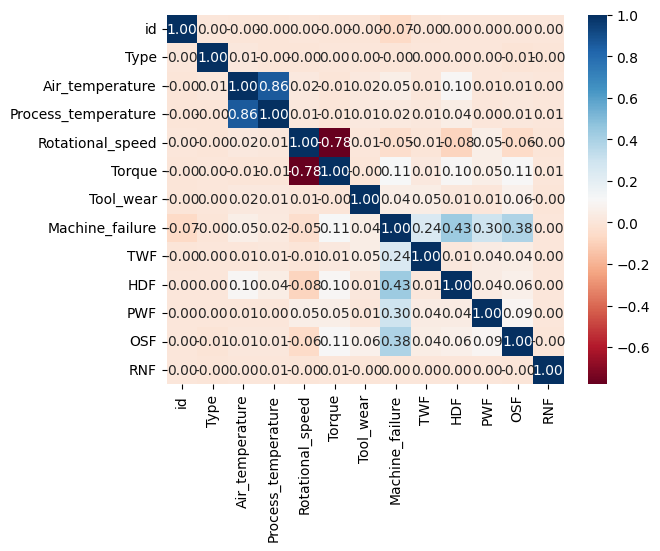

In [ ]:
sns.heatmap(data.corr(), cmap='RdBu', annot=True, fmt=".2f")
#plt.xticks(range(len(corr.columns)), corr.columns);
#plt.yticks(range(len(corr.columns)), corr.columns)
#plt.show()


above heatmap shows that
# machine failure is caused because of Tool_wear_failure,Heat_Dissipation Failure,Power Failure,Overstrain Failure
and process temperature and air temperature has correlation

#To see the distribution of all numeric variable we use Histogram

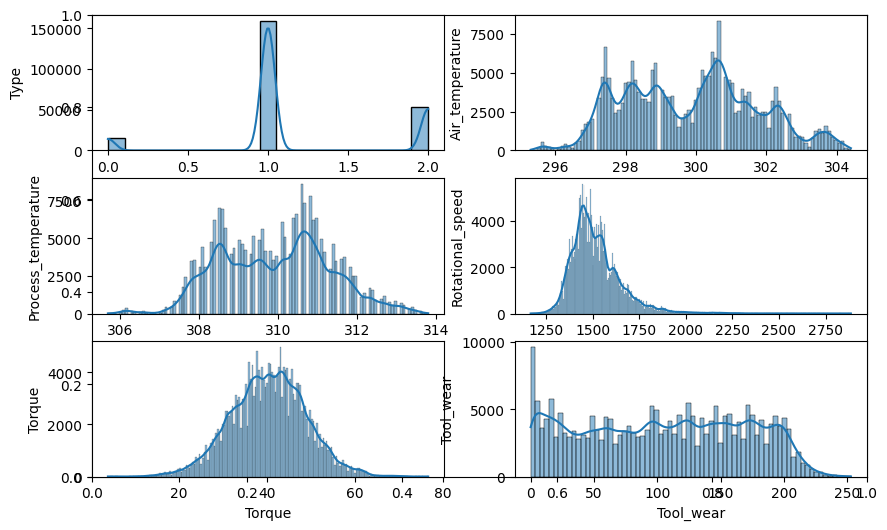

In [ ]:
features = ['Type', 'Air_temperature', 'Process_temperature',
       'Rotational_speed', 'Torque', 'Tool_wear']
plt.subplots(figsize=(10,6))
for i,col in enumerate(features):
  plt.subplot(3,2,i+1)
  sns.histplot(data=data,x=col,kde=True)
  plt.xlabel(col)
  plt.ylabel(col)
plt.show()

#Boxplot is used to see skewness, outliers of variables

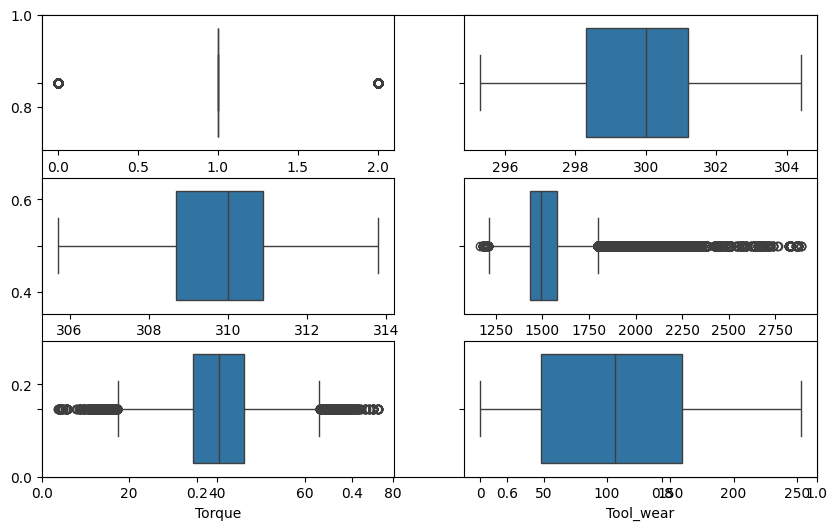

In [ ]:
features = ['Type', 'Air_temperature', 'Process_temperature',
       'Rotational_speed', 'Torque', 'Tool_wear']
plt.subplots(figsize=(10,6))
for i,col in enumerate(features):
  plt.subplot(3,2,i+1)
  sns.boxplot(data=data,x=col)
plt.show()

Torque and rotational speed has outliers

Length of Torque Outliers

In [ ]:
len(data[data['Torque']<18])+ len(data[data['Torque']>63])

2035

Length of rotational speed outliers

In [ ]:
len(data[data['Rotational_speed']>2000])

2200

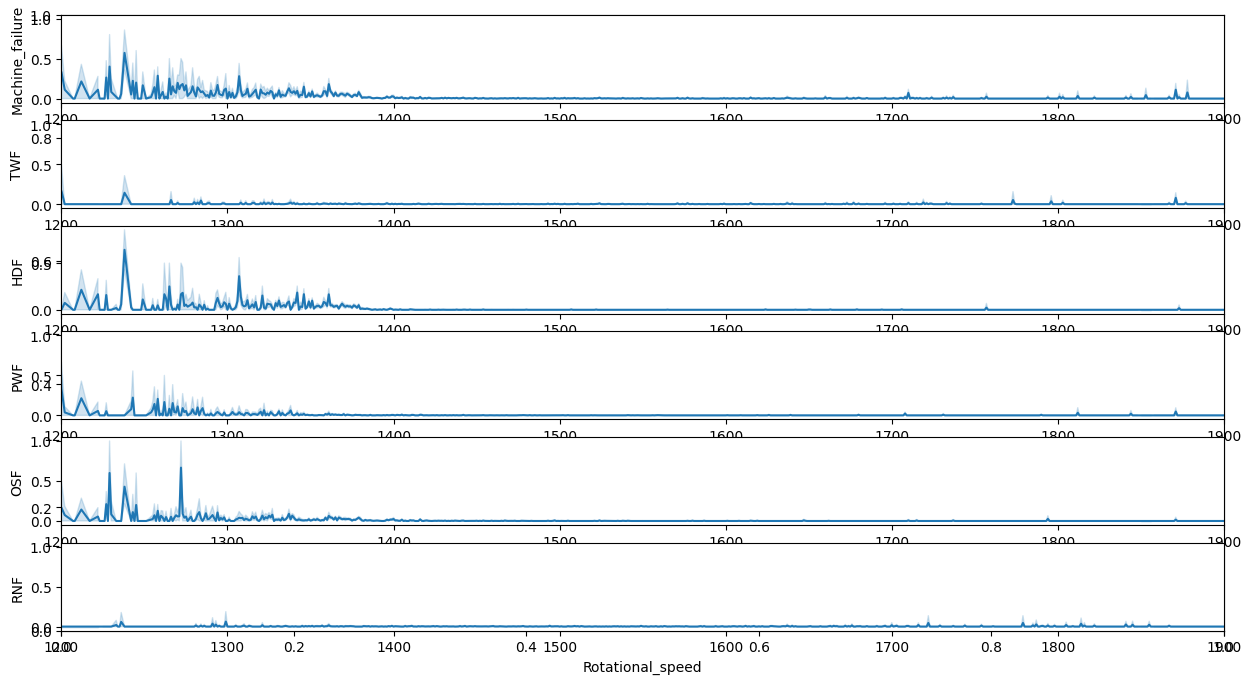

In [ ]:
features = ['Machine_failure', 'TWF', 'HDF', 'PWF', 'OSF','RNF']
plt.subplots(figsize=(15,8))
for i,col in enumerate(features):
  plt.subplot(6,1,i+1)
  sns.lineplot(data=data,x='Rotational_speed',y=col)
  plt.xlim(1200,1900)
plt.show()

Low Rotational speed results in HDF,PWF,OSF,Machine Failure

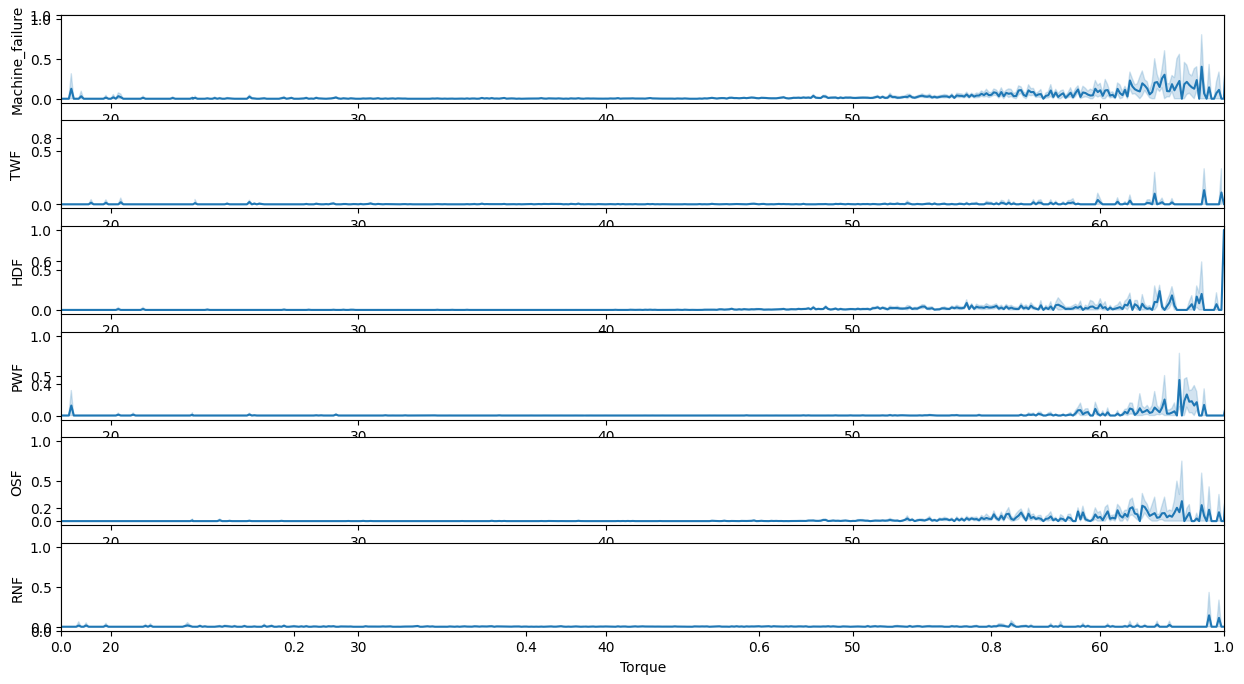

In [ ]:
features = ['Machine_failure', 'TWF', 'HDF', 'PWF', 'OSF','RNF']
plt.subplots(figsize=(15,8))
for i,col in enumerate(features):
  plt.subplot(6,1,i+1)
  sns.lineplot(data=data,x='Torque',y=col)
  plt.xlim(18,65)
plt.show()

Higher Torque impacts OSF,PWF,HDF and Machine Failure

Unique values and length of unique Values of all vaiables using UNIQUE() and NUNIQUE()

In [ ]:
features = ['id',  'Type', 'Air_temperature',
       'Process_temperature', 'Rotational_speed', 'Torque',
       'Tool_wear', 'Machine_failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF']

for i,col in enumerate(features):
    print(f' columns in {col}\n {data[col].unique()}')
    print(f' len of column {col} \n {data[col].nunique()}')


 columns in id
 [     0      1      2 ... 227380 227381 227382]
 len of column id 
 227383
 columns in Type
 [1 2 0]
 len of column Type 
 3
 columns in Air_temperature
 [300.6   302.6   299.3   301.    298.    298.4   299.6   298.7   297.7
 300.5   301.5   301.4   297.1   298.5   297.6   300.4   303.5   298.6
 300.9   297.2   298.3   297.4   301.3   300.2   300.1   297.8   300.7
 300.8   299.2   299.7   302.5   301.8   296.7   302.4   298.1   301.9
 299.1   299.    299.8   298.9   297.3   297.9   298.8   300.    302.3
 297.5   303.9   301.7   303.7   301.2   303.3   303.6   300.3   302.1
 299.5   299.4   302.2   297.    298.2   304.    303.1   296.9   301.1
 295.5   302.    304.2   303.4   296.1   302.9   301.6   304.1   303.
 295.6   302.7   296.8   296.2   303.8   299.9   295.7   303.2   296.3
 295.9   295.8   302.8   296.6   296.5   296.4   304.3   296.    295.4
 304.4   295.3   300.98  297.095 303.96 ]
 len of column Air_temperature 
 95
 columns in Process_temperature
 [309.6  31

In [ ]:
features = ['Type', 'Air_temperature', 'Process_temperature']
features = ['Rotational_speed', 'Torque', 'Tool_wear']
features = ['TWF','HDF', 'PWF', 'OSF', 'RNF']


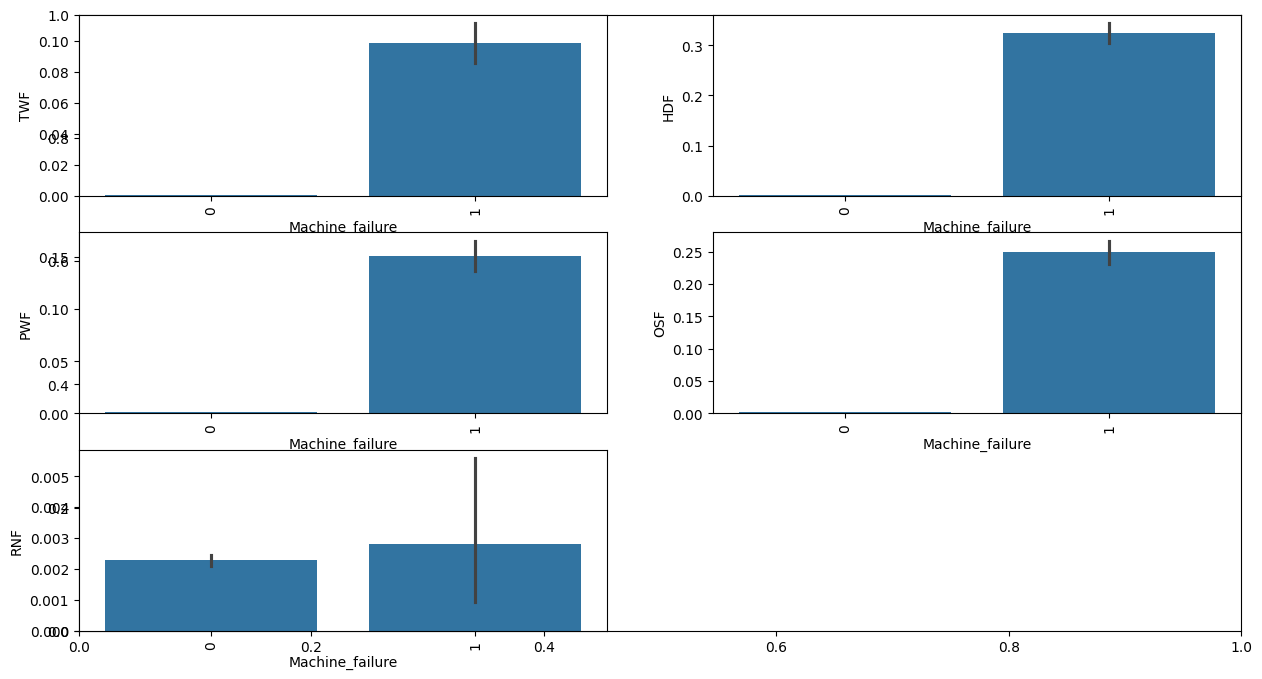

In [ ]:
features = ['TWF','HDF', 'PWF', 'OSF', 'RNF']
plt.subplots(figsize=(15,8))
for i,col in enumerate(features):
    plt.subplot(3,2,i+1)
    sns.barplot(data=data,x='Machine_failure',y=col)
    plt.xticks(rotation=90)
plt.show()

Machine_Failure is caused by PWF,OSF,TWF,HDF

In [ ]:
data.keys()

Index(['id', 'Type', 'Air_temperature', 'Process_temperature',
       'Rotational_speed', 'Torque', 'Tool_wear', 'Machine_failure', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

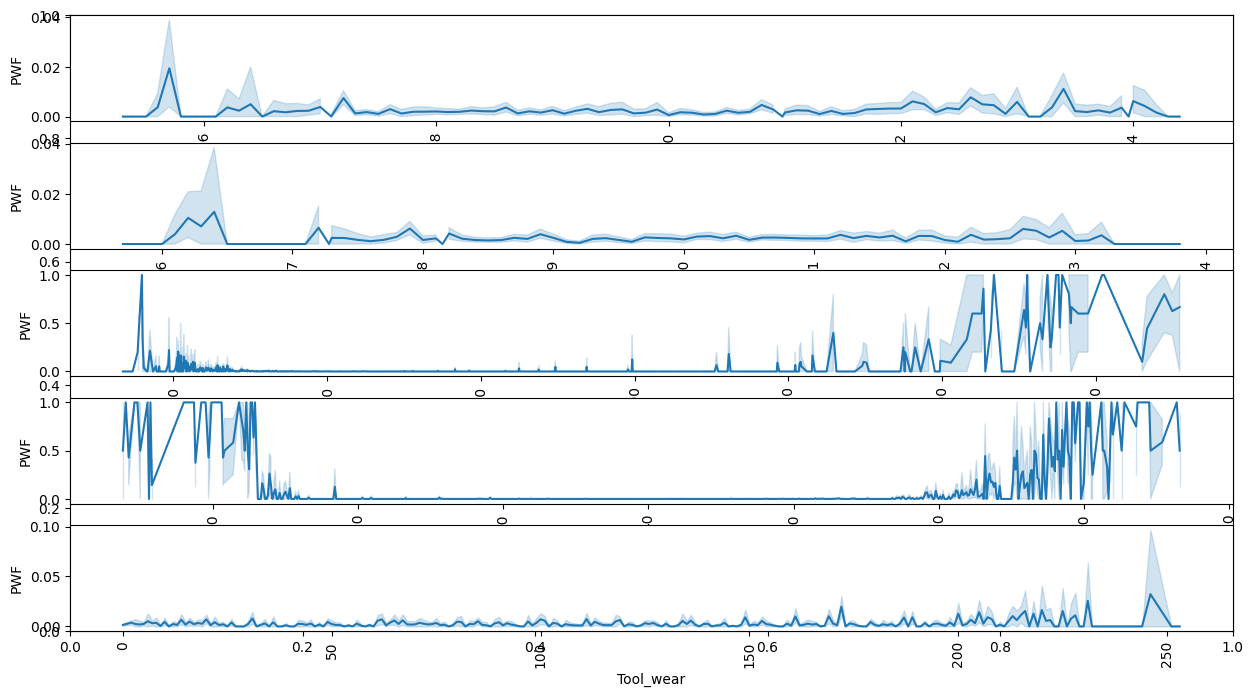

In [ ]:
features = ['Air_temperature', 'Process_temperature',
       'Rotational_speed', 'Torque', 'Tool_wear']
plt.subplots(figsize=(15,8))
for i,col in enumerate(features):
    plt.subplot(5,1,i+1)
    sns.lineplot(data=data,x=col,y='PWF')
    plt.xticks(rotation=90)
plt.show()


Rotational speed and Torque are seen as major factors for POWER FAILURE

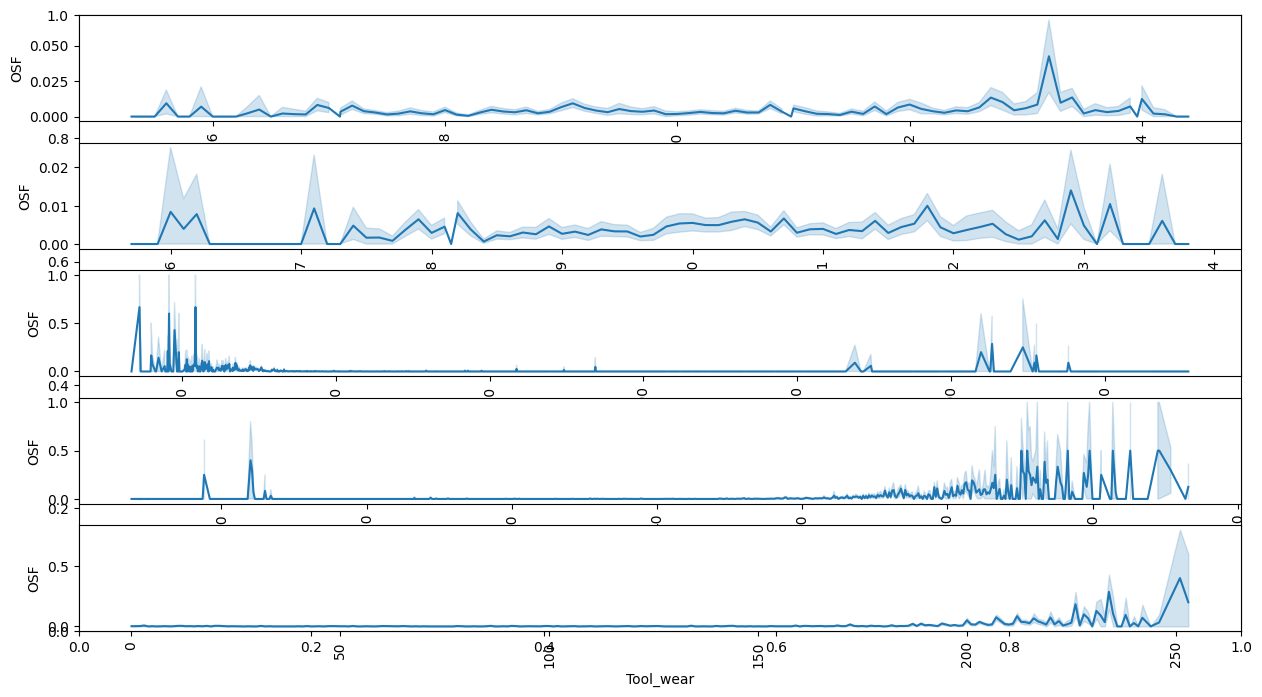

In [ ]:
features = ['Air_temperature', 'Process_temperature',
       'Rotational_speed', 'Torque', 'Tool_wear']
plt.subplots(figsize=(15,8))
for i,col in enumerate(features):
    plt.subplot(5,1,i+1)
    sns.lineplot(data=data,x=col,y='OSF')
    plt.xticks(rotation=90)
plt.show()


Overstrain Failure is caused by higher Torque and more Tool_wear also lower rotational speed has impact for OSF

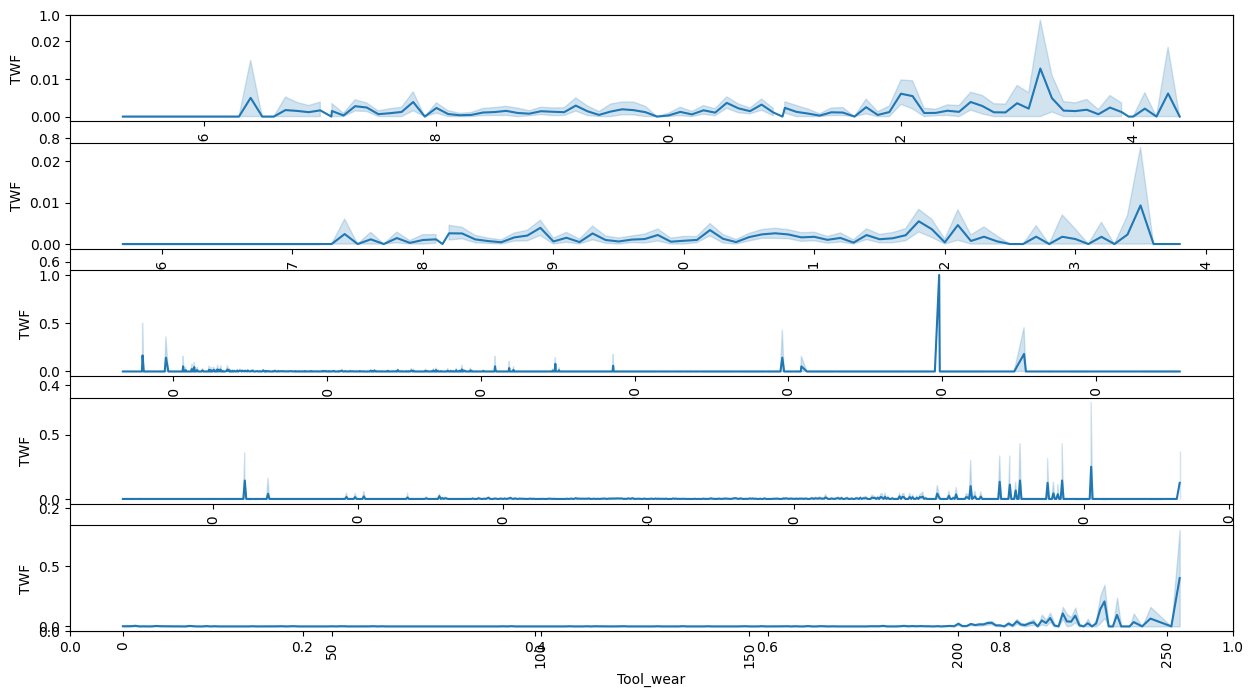

In [ ]:
features = ['Air_temperature', 'Process_temperature',
       'Rotational_speed', 'Torque', 'Tool_wear']
plt.subplots(figsize=(15,8))
for i,col in enumerate(features):
    plt.subplot(5,1,i+1)
    sns.lineplot(data=data,x=col,y='TWF')
    plt.xticks(rotation=90)
plt.show()


Toolwear failure is seen mostly because of increase in use of Tool_wear

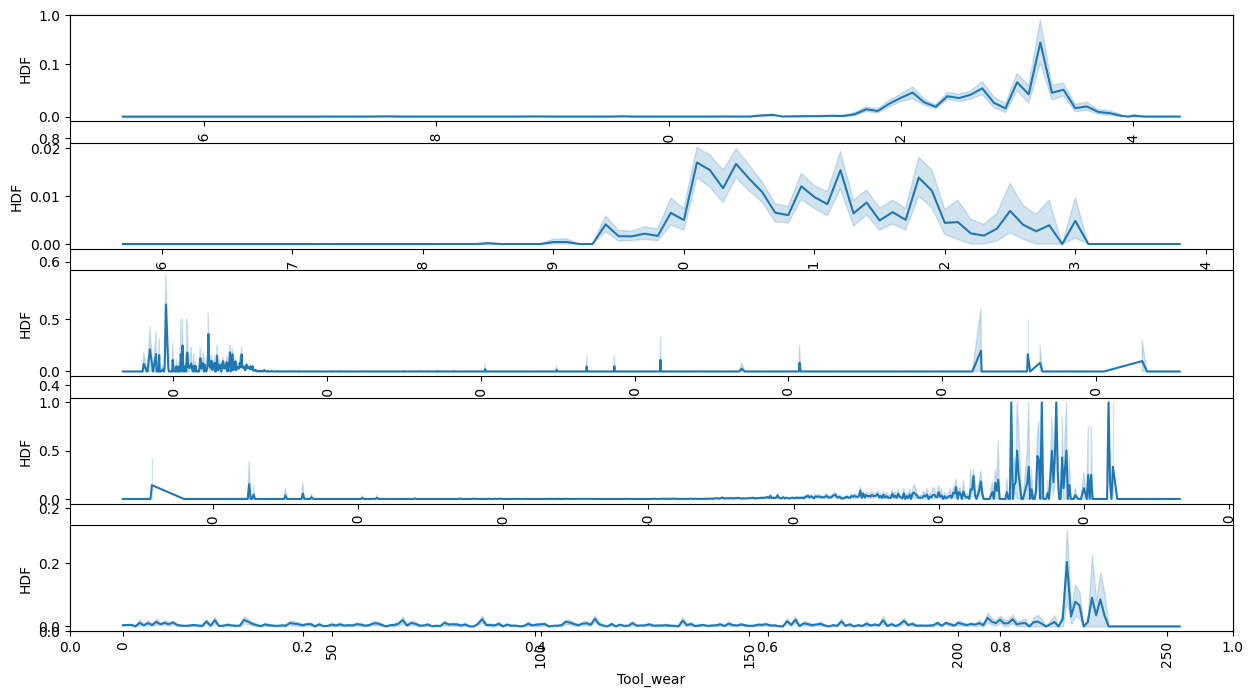

In [ ]:
features = ['Air_temperature', 'Process_temperature',
       'Rotational_speed', 'Torque', 'Tool_wear']
plt.subplots(figsize=(15,8))
for i,col in enumerate(features):
    plt.subplot(5,1,i+1)
    sns.lineplot(data=data,x=col,y='HDF')
    plt.xticks(rotation=90)
plt.show()


Heat Dissipation is observed mostly because of high Air Temperature,high Process Temperature, high torque and also increase use of Toolwear, and very less rotational speed

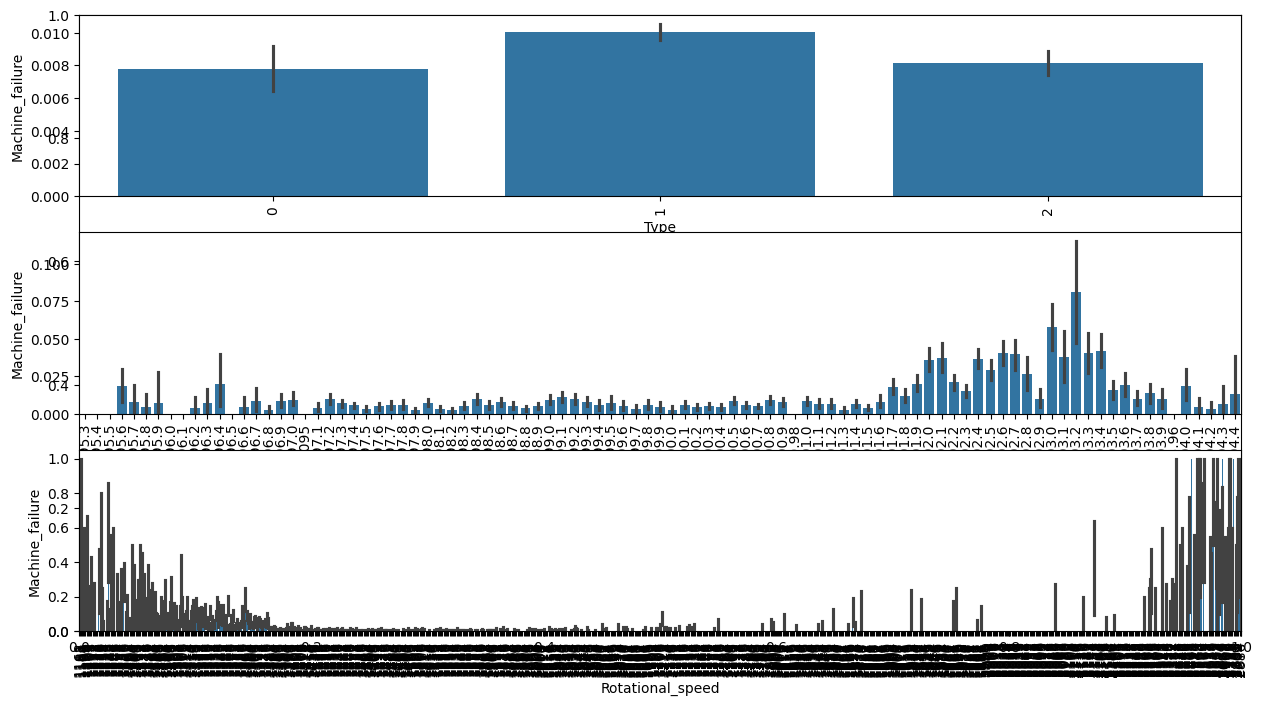

In [ ]:
features = ['Type', 'Air_temperature', 'Rotational_speed']
plt.subplots(figsize=(15,8))
for i,col in enumerate(features):
    plt.subplot(3,1,i+1)
    sns.barplot(data=data,x=col,y='Machine_failure')
    plt.xticks(rotation=90)
plt.show()



Type 'M' has maximum machine_failure
As the Air temperature increases machine_failure increases, so we company should pay attention on Air Temperature to reduce Machine Failure
Process Temperature has little impact on machine_failure

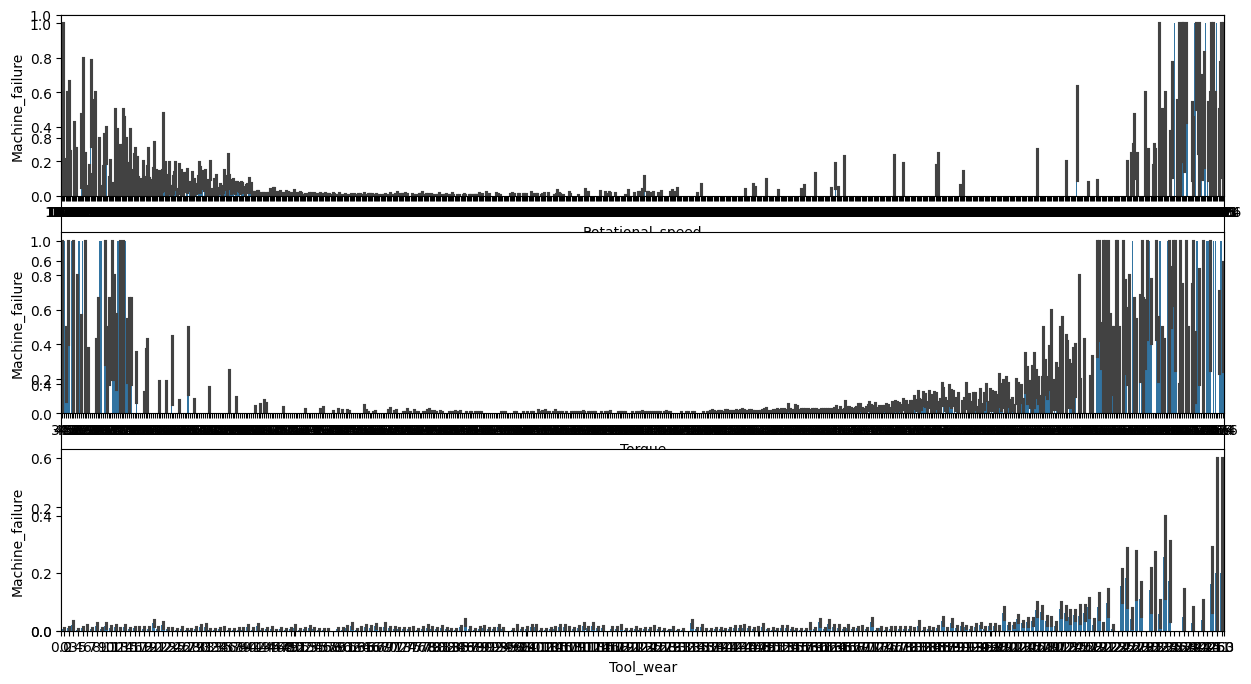

In [ ]:

features = ['Rotational_speed', 'Torque', 'Tool_wear']
plt.subplots(figsize=(15,8))
for i,col in enumerate(features):
    plt.subplot(3,1,i+1)
    sns.barplot(data=data,x=col,y='Machine_failure')
plt.show()

Whenever rotational Speed and torque is very less or very high, the chances of Machine Failure increases, so rotational Speed and torque should be mainted moderate

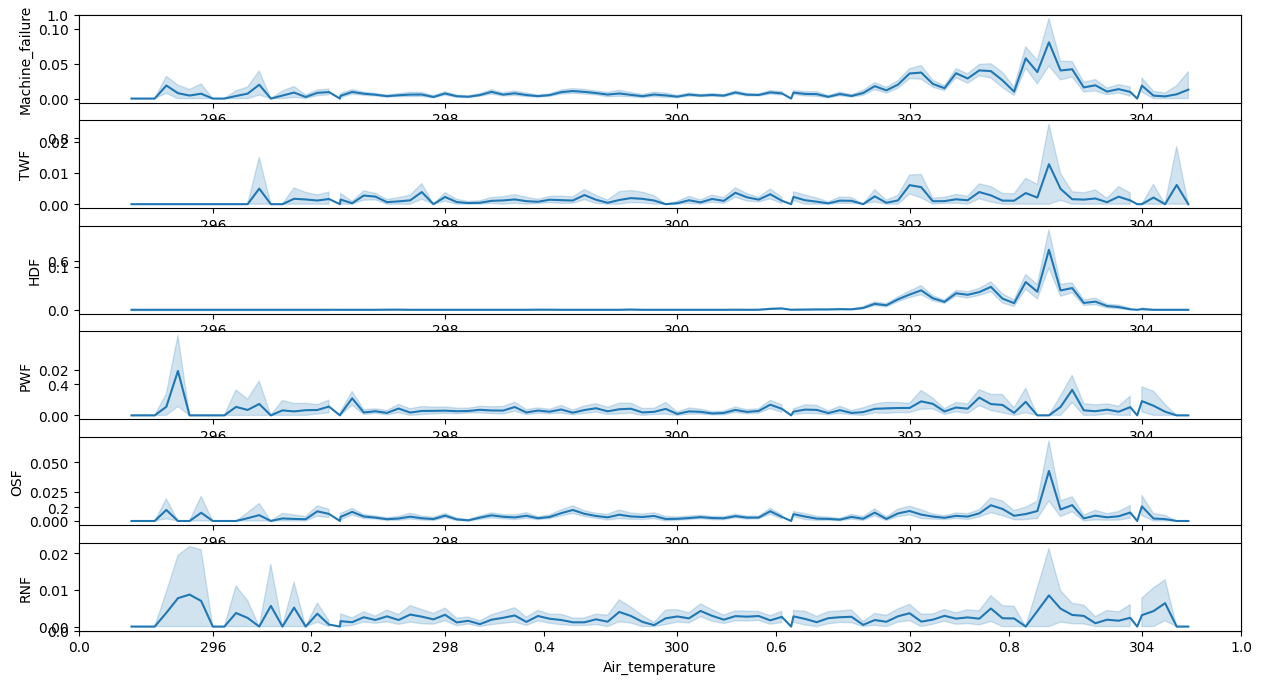

In [ ]:
features = ['Machine_failure', 'TWF', 'HDF', 'PWF', 'OSF','RNF']
plt.subplots(figsize=(15,8))
for i,col in enumerate(features):
  plt.subplot(6,1,i+1)
  sns.lineplot(data=data,x='Air_temperature',y=col)
plt.show()

High Air_temperature results is Machine_failure,TWF,HDF,OSF

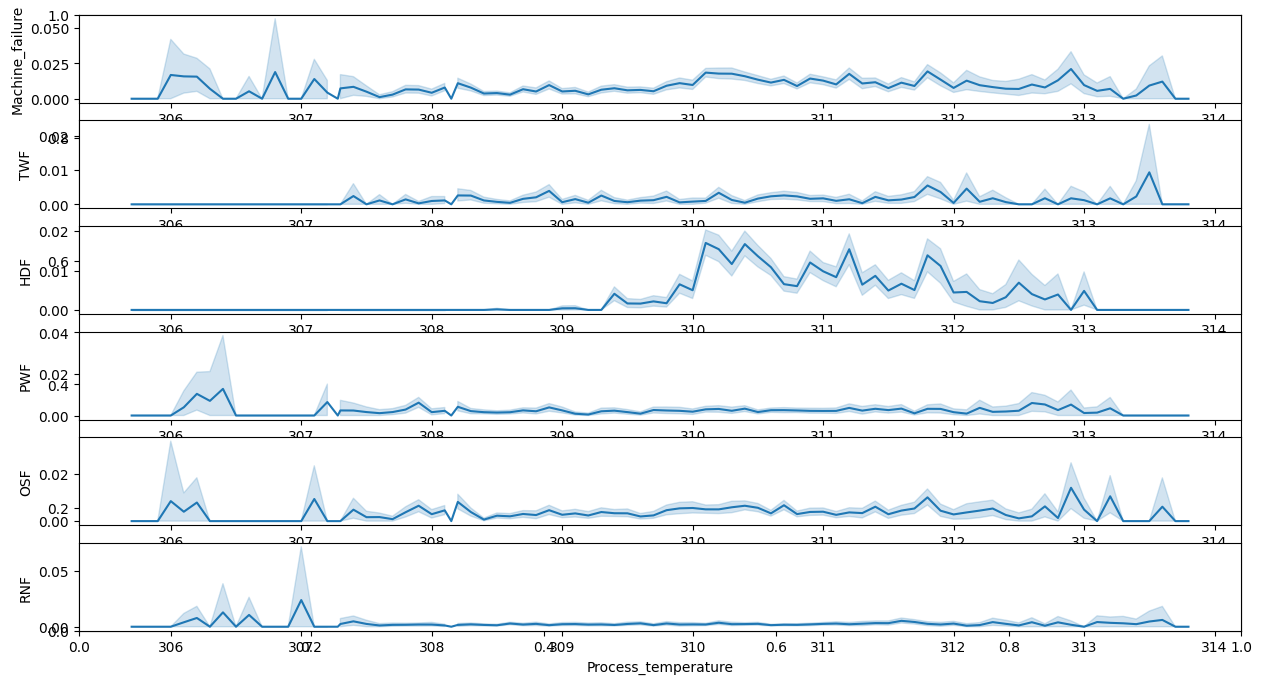

In [ ]:
features = ['Machine_failure', 'TWF', 'HDF', 'PWF', 'OSF','RNF']
plt.subplots(figsize=(15,8))
for i,col in enumerate(features):
  plt.subplot(6,1,i+1)
  sns.lineplot(data=data,x='Process_temperature',y=col)

plt.show()

high Process temperature impacts HDF, and has contribution to some extent in Machine Failure as well
and low Process temperature impacts RNF

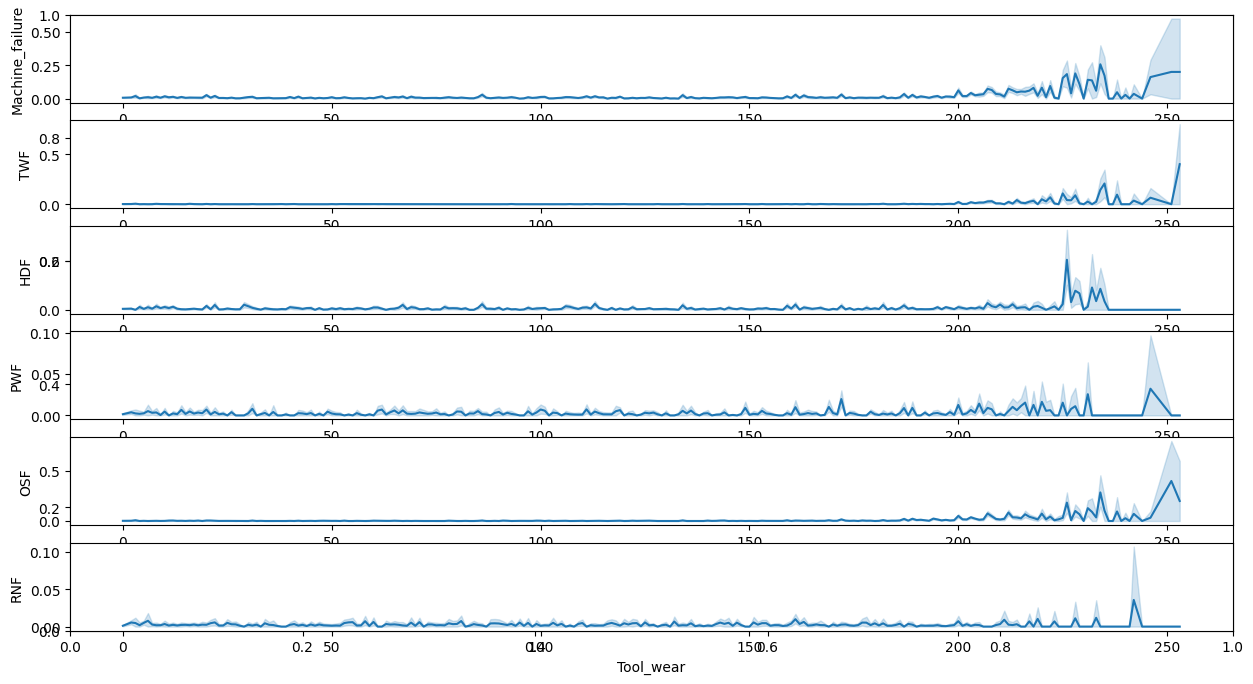

In [ ]:
features = ['Machine_failure', 'TWF', 'HDF', 'PWF', 'OSF','RNF']
plt.subplots(figsize=(15,8))
for i,col in enumerate(features):
  plt.subplot(6,1,i+1)
  sns.lineplot(data=data,x='Tool_wear',y=col)
plt.show()

Higher use of Tool wear results in Machine Failure,OSF,TWF

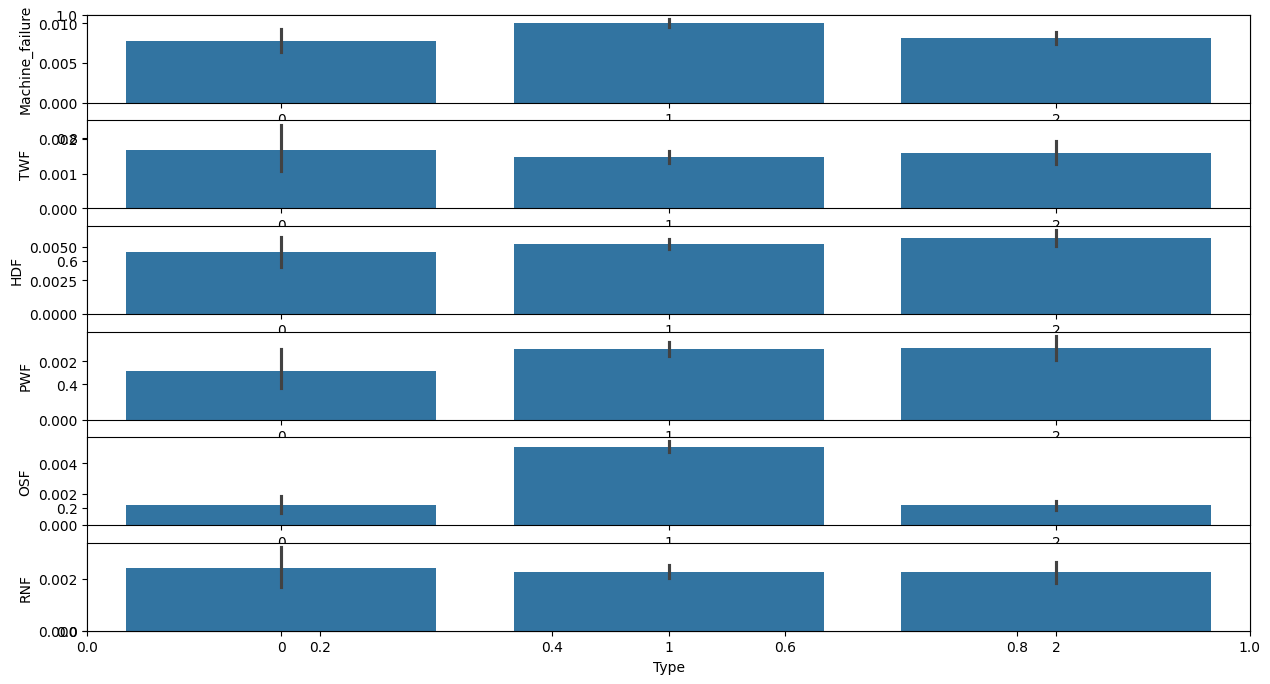

In [ ]:
features = ['Machine_failure', 'TWF', 'HDF', 'PWF', 'OSF','RNF']
plt.subplots(figsize=(15,8))
for i,col in enumerate(features):
  plt.subplot(6,1,i+1)
  sns.barplot(data=data,x='Type',y=col)
plt.show()

##**Type M has maximum Machine Failures
##**Type H has maximum HDF
##**Type M has maximum Machine Failures

In [ ]:
data.keys()

Index(['id', 'Type', 'Air_temperature', 'Process_temperature',
       'Rotational_speed', 'Torque', 'Tool_wear', 'Machine_failure', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

## Observations

Low Rotational speed results in HDF,PWF,OSF,Machine Failure

Higher Torque impacts OSF,PWF,HDF and Machine Failure

Machine_Failure is caused by PWF,OSF,TWF,HDF

Rotational speed and Torque are seen as major factors for POWER FAILURE

Overstrain Failure is caused by higher Torque and more Tool_wear also lower rotational speed has impact for OSF

Toolwear failure is seen mostly because of increase in use of Tool_wear

Heat Dissipation is observed mostly because of high Air Temperature,high Process Temperature, high torque and also increase use of Toolwear, and very less rotational speed

Type 'M' has maximum machine_failure As the Air temperature increases machine_failure increases, so we company should pay attention on Air Temperature to reduce Machine Failure Process Temperature has little impact on machine_failure


Whenever rotational Speed and torque is very less or very high, the chances of Machine Failure increases, so rotational Speed and torque should be mainted moderate

High Air_temperature results is Machine_failure,TWF,HDF,OSF

high Process temperature impacts HDF, and has contribution to some extent in Machine Failure as well and low Process temperature impacts RNF

Higher use of Tool wear results in Machine Failure,OSF,TWF

**Type M has maximum Machine Failures
**Type H has maximum HDF
**Type M has maximum Machine Failures

Solutions

##Solutions

Maintain moderate rotational speed to reduce Machine failure and Powerfailure                       
Reduce Torque to reduce Machine failure       
Reduce Air Temperature to reduce Machine_failure,TWF,HDF,OSF             
Reduce  Process temperature to reduce HDF      
Reduce Toolwear use to reduce Machine Failure,OSF,TWF